In [1]:
library(ggVennDiagram)
library(microbiome)
library(phyloseq)
library(stringr)
library(dplyr)
library(vegan)
#https://www.yanh.org/2021/01/01/microbiome-r/
#https://github.com/erictleung/phyloseq-cheatsheet
#http://deneflab.github.io/MicrobeMiseq/demos/mothur_2_phyloseq.html
#https://rstudio-pubs-static.s3.amazonaws.com/330760_8bba830836324bf6b100d4e76f49e3d2.html
#https://micca.readthedocs.io/en/latest/phyloseq.html
#https://www.bioconductor.org/packages/release/bioc/vignettes/phyloseq/inst/doc/phyloseq-analysis.html

Loading required package: phyloseq

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: 'microbiome'


The following object is masked from 'package:ggplot2':

    alpha


The following object is masked from 'package:ggVennDiagram':

    overlap


The following object is masked from 'package:base':

    transform



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: 'vegan'


The following object is masked from 'package:microbiome':

    diversity




In [2]:
metadata <- read.table(file = "sample-metadata.tsv", sep = "\t", header = T, row.names = 1)
head(metadata)

,qubit.conc,estuary.reach,ecosystem,sediment.water,TotalPairsReadNumber,ConnectTagNumber,ConnectRatio...,RawData.Mbp.,PloyBase...,LowQuality...
,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RemovePrimer_Final.LWR_SM_1.1,33.8,Lower,Saltmarsh,Sediment,70012,69770,99.65,35.52,0.003,0.011
RemovePrimer_Final.LWR_SM_1.2,29.8,Lower,Saltmarsh,Sediment,70015,69848,99.76,35.51,0.004,0.007
RemovePrimer_Final.LWR_SM_1.3,34.4,Lower,Saltmarsh,Sediment,70008,69825,99.74,35.51,0.001,0.011
RemovePrimer_Final.LWR_SM_2.1,37.0,Lower,Saltmarsh,Sediment,70008,69810,99.72,35.51,0.004,0.004
RemovePrimer_Final.LWR_SM_2.2,22.0,Lower,Saltmarsh,Sediment,70011,69840,99.76,35.51,0.004,0.007
RemovePrimer_Final.LWR_SM_2.3,21.4,Lower,Saltmarsh,Sediment,70008,69820,99.73,35.51,0.002,0.008


In [3]:
otu <- read.table(file = "feature-table.tsv", sep = "\t", header = T, row.names = 1, skip = 1, comment.char = "")
head(otu)

,RemovePrimer_Final.LWR_MN_1.1,RemovePrimer_Final.LWR_MN_1.2,RemovePrimer_Final.LWR_MN_1.3,RemovePrimer_Final.LWR_MN_2.1,RemovePrimer_Final.LWR_MN_2.2,RemovePrimer_Final.LWR_MN_2.3,RemovePrimer_Final.LWR_MN_3.1,RemovePrimer_Final.LWR_MN_3.2,RemovePrimer_Final.LWR_MN_3.3,RemovePrimer_Final.LWR_MN_4.1,...,RemovePrimer_Final.UPR_SM_2.3,RemovePrimer_Final.UPR_SM_3.1,RemovePrimer_Final.UPR_SM_3.2,RemovePrimer_Final.UPR_SM_3.3,RemovePrimer_Final.UPR_SM_4.1,RemovePrimer_Final.UPR_SM_4.2,RemovePrimer_Final.UPR_SM_4.3,RemovePrimer_Final.UPR_SM_5.1,RemovePrimer_Final.UPR_SM_5.2,RemovePrimer_Final.UPR_SM_5.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4a6be5e9e94db1d403ce3eb6c604afdd,38,99,50,88,55,107,0,0,53,62,...,0,0,0,65,130,118,133,186,150,211
1d4287101d4e69b6bba45059df936480,0,0,0,0,0,0,0,0,0,43,...,0,0,0,0,0,0,0,0,0,131
13549e136d57af07df6f8cef491cf372,0,25,13,29,29,28,28,0,10,21,...,0,0,0,20,47,43,59,49,77,127
ffeb5e83cf32481269946a36c7631080,0,0,0,56,75,82,0,0,0,24,...,0,31,33,0,34,0,0,18,21,33
956ed0a37e9783d16aa37bfd83585eef,19,36,32,51,47,53,0,0,0,0,...,0,0,0,0,54,52,42,92,114,143
37896f1ab4642c6e16776fccb80b04f5,42,55,51,97,104,133,29,0,0,0,...,0,58,28,45,129,138,100,142,149,158


In [4]:
taxonomy_raw <- read.table(file = "taxonomy.tsv", sep = "\t", header = T ,row.names = 1)
head(taxonomy_raw)

,Taxon,Confidence
,<chr>,<dbl>
4a6be5e9e94db1d403ce3eb6c604afdd,d__Bacteria; p__Desulfobacterota; c__Desulfobulbia; o__Desulfobulbales; f__Desulfocapsaceae; g__uncultured,0.9260010
1d4287101d4e69b6bba45059df936480,d__Bacteria; p__Desulfobacterota; c__Desulfobulbia; o__Desulfobulbales; f__Desulfocapsaceae; g__uncultured,0.9877802
13549e136d57af07df6f8cef491cf372,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Steroidobacterales; f__Woeseiaceae; g__Woeseia; s__uncultured_gamma,0.8081569
ffeb5e83cf32481269946a36c7631080,d__Bacteria; p__Desulfobacterota; c__Desulfobulbia; o__Desulfobulbales; f__Desulfocapsaceae; g__uncultured; s__uncultured_delta,0.9281044
956ed0a37e9783d16aa37bfd83585eef,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Steroidobacterales; f__Woeseiaceae; g__Woeseia,0.9932000
37896f1ab4642c6e16776fccb80b04f5,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Cellvibrionales; f__Halieaceae; g__Halioglobus,0.7158008


In [5]:
tax <- taxonomy_raw %>% 
       tidyr::separate(Taxon, c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"), sep = "; ") %>%
       dplyr::mutate(across(1:7, ~ stringr::str_replace_all(.x, "^[dkpcofgs]__",""))) %>%
       dplyr::select(1:7)

head(tax)

Warning message:
"Expected 7 pieces. Missing pieces filled with `NA` in 18661 rows [1, 2, 5, 6, 8, 9, 11, 12, 14,
15, 16, 21, 22, 24, 25, 30, 31, 32, 33, 34, ...]."


,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4a6be5e9e94db1d403ce3eb6c604afdd,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfocapsaceae,uncultured,NA
1d4287101d4e69b6bba45059df936480,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfocapsaceae,uncultured,NA
13549e136d57af07df6f8cef491cf372,Bacteria,Proteobacteria,Gammaproteobacteria,Steroidobacterales,Woeseiaceae,Woeseia,uncultured_gamma
ffeb5e83cf32481269946a36c7631080,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfocapsaceae,uncultured,uncultured_delta
956ed0a37e9783d16aa37bfd83585eef,Bacteria,Proteobacteria,Gammaproteobacteria,Steroidobacterales,Woeseiaceae,Woeseia,NA
37896f1ab4642c6e16776fccb80b04f5,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,Halioglobus,NA


In [6]:
OTU = otu_table(as.matrix(otu), taxa_are_rows = TRUE)
TAX = tax_table(as.matrix(tax))
SAMPLE <- sample_data(metadata)
TREE = read_tree("tree.nwk")
# merge the data
ps <- phyloseq(OTU, TAX, SAMPLE,TREE)

In [7]:
#we can use the table.qzv to view sample read depths to determine a good sampling depth using the interactive detail view
#https://docs.qiime2.org/2023.5/tutorials/moving-pictures/#alpha-and-beta-diversity-analysis
#important to note that samples falling below this will be dropped from the analysis
data.frame(reads = colSums(OTU)) %>% 
dplyr::arrange(reads)

,reads
,<dbl>
RemovePrimer_Final.MID_SM_5.1,39741
RemovePrimer_Final.MID_SM_3.2,39811
RemovePrimer_Final.LWR_SM_3.1,39853
RemovePrimer_Final.MID_SM_1.3,40238
RemovePrimer_Final.MID_MN_3.1,40312
RemovePrimer_Final.LWR_SM_5.3,40371
RemovePrimer_Final.LWR_SM_3.3,40422
RemovePrimer_Final.LWR_SM_1.1,40467
RemovePrimer_Final.UPR_MN_1.1,40671


In [8]:
#This takes forever to run
#vegan::rarecurve(t(otu))

In [9]:
#This is just for demonstration purporse rarefaction is now frowned upon please see ?phyloseq::rarefy_even_depth
#We are going to use it for now until we find a better alternative
#The sample size set here is for demostration purposes to test the code
#For sample size use the same number used for -sampling-depth in Qiime
ps_rarefied = phyloseq::rarefy_even_depth(ps, rngseed=1, sample.size=1000, replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

29033OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [10]:
# Get the distance bray
bray_dist <- phyloseq::distance(ps_rarefied, method="bray")

In [11]:
head(metadata)

,qubit.conc,estuary.reach,ecosystem,sediment.water,TotalPairsReadNumber,ConnectTagNumber,ConnectRatio...,RawData.Mbp.,PloyBase...,LowQuality...
,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RemovePrimer_Final.LWR_SM_1.1,33.8,Lower,Saltmarsh,Sediment,70012,69770,99.65,35.52,0.003,0.011
RemovePrimer_Final.LWR_SM_1.2,29.8,Lower,Saltmarsh,Sediment,70015,69848,99.76,35.51,0.004,0.007
RemovePrimer_Final.LWR_SM_1.3,34.4,Lower,Saltmarsh,Sediment,70008,69825,99.74,35.51,0.001,0.011
RemovePrimer_Final.LWR_SM_2.1,37.0,Lower,Saltmarsh,Sediment,70008,69810,99.72,35.51,0.004,0.004
RemovePrimer_Final.LWR_SM_2.2,22.0,Lower,Saltmarsh,Sediment,70011,69840,99.76,35.51,0.004,0.007
RemovePrimer_Final.LWR_SM_2.3,21.4,Lower,Saltmarsh,Sediment,70008,69820,99.73,35.51,0.002,0.008


In [12]:
xtabs(~ estuary.reach + ecosystem, data = metadata)

             ecosystem
estuary.reach Mangrove Saltmarsh Seagrass
       Lower        15        15       15
       Middle       15        15       15
       Upper        15        15       15

In [13]:
#https://stats.stackexchange.com/questions/476256/adonis-vs-adonis2
metadata <- data.frame(sample_data(ps_rarefied))
(adonis_results <- vegan::adonis2(bray_dist ~ ecosystem * estuary.reach, data = metadata))

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ecosystem,2,5.294769,0.10690454,9.946270,0.001
estuary.reach,2,3.408510,0.06881985,6.402916,0.001
ecosystem:estuary.reach,4,7.287489,0.14713874,6.844806,0.001
Residual,126,33.537241,0.67713687,NA,NA
Total,134,49.528009,1.00000000,NA,NA


In [14]:
unique(sample_data(ps_rarefied)[["ecosystem"]]) 

[1] "Mangrove"  "Seagrass"  "Saltmarsh"

In [15]:
asv2rank <-  function(tax, rank){         
    tax %>% 
    tibble::rownames_to_column(var =  "ASV") %>%
    dplyr::select(all_of(c("ASV", rank)))
}

In [16]:
class_table <- asv2rank(tax, "Class") 
head(class_table)

,ASV,Class
,<chr>,<chr>
1,4a6be5e9e94db1d403ce3eb6c604afdd,Desulfobulbia
2,1d4287101d4e69b6bba45059df936480,Desulfobulbia
3,13549e136d57af07df6f8cef491cf372,Gammaproteobacteria
4,ffeb5e83cf32481269946a36c7631080,Desulfobulbia
5,956ed0a37e9783d16aa37bfd83585eef,Gammaproteobacteria
6,37896f1ab4642c6e16776fccb80b04f5,Gammaproteobacteria


In [17]:
#takes a vector of ASVs as input and data.frame of ASV and rank
#returns a vector of rank names
asv2rankname <-  function(asv_query, ref = "Class", ranktable = class_table){
    
    data.frame(ASV = asv_query) %>%
    dplyr::inner_join(ranktable) %>%
    dplyr::select({{ref}})%>%
    dplyr::distinct() %>%
    dplyr::pull({{ref}}) 
    
}

In [18]:
#asv2rankname(sample(class_table$ASV))

In [19]:
get_sample_taxa <- function(physeq, my_var){
   
   #get list of features for the column variable
   var_list <- unique(sample_data(physeq)[[my_var]])
   data_list <- list() 
   
    for (value in var_list){
        
       value <<- value
       my_var <<- my_var
       #get subset of samples for for each value in column
       ps_subset <- subset_samples(physeq,  ecosystem == value)
       #get the list of ASVs in the ps_subset
       var_core <- core_members(ps_subset, detection = 0, prevalence = 0)
       #get the name of the ASV in this case we use the class table
       data_list[[value]]  <- asv2rankname(data.frame(ASV = var_core))
        
    }
print(lengths(data_list))
return(data_list)
}

In [20]:
sample_classes_list <- get_sample_taxa(ps_rarefied, "ecosystem")

Joining with `by = join_by(ASV)`
Joining with `by = join_by(ASV)`
Joining with `by = join_by(ASV)`


 Mangrove  Seagrass Saltmarsh 
      163       154       162 


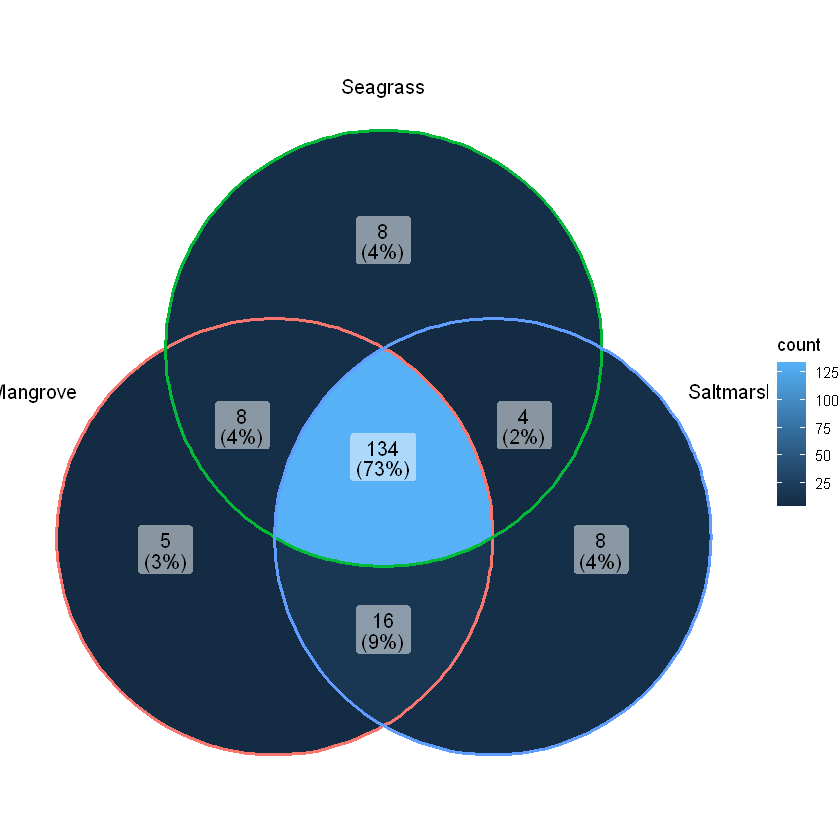

In [21]:
ggVennDiagram(sample_classes_list)

In [22]:
#Creates a data.frame of unequal number of rows from the list
sample_data <- lapply(names(sample_classes_list), function(v_name, data_list = sample_classes_list){
        
        n_max <-  max(lengths(data_list))
        tmp_vector <- data_list[[v_name]]
        n <- length(tmp_vector)
        tmp <- data.frame(matrix(ncol = 1, nrow = n_max)) 
        names(tmp) <- v_name
        tmp[1:n, v_name] <- tmp_vector        
    return(tmp) 
    
})

sample_classes_df <-  do.call(cbind, sample_data)

In [23]:
sample_classes_df

Mangrove,Seagrass,Saltmarsh
<chr>,<chr>,<chr>
Alphaproteobacteria,Alphaproteobacteria,Alphaproteobacteria
Nanoarchaeia,Nanoarchaeia,Nanoarchaeia
Thermococci,NA,Altiarchaeia
Aenigmarchaeia,Altiarchaeia,Methanobacteria
NA,Thermococci,Iainarchaeia
Lokiarchaeia,Methanobacteria,Aenigmarchaeia
Heimdallarchaeia,Aenigmarchaeia,NA
Asgardarchaeota,Deep_Sea_Euryarchaeotic_Group(DSEG),Odinarchaeia
Odinarchaeia,Lokiarchaeia,Nitrososphaeria


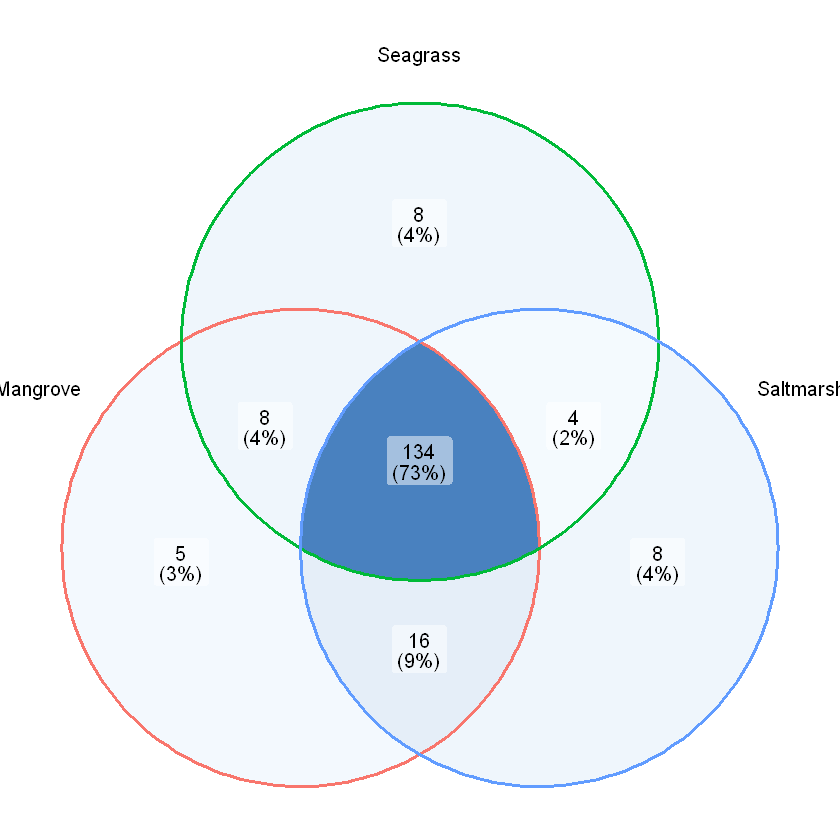

In [24]:
ggVennDiagram(sample_classes_df) + 
 scale_fill_gradient(low = "#F4FAFE", high = "#4981BF") +
 theme(legend.position = "none")